In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [63]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

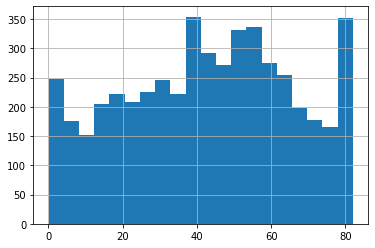

In [64]:
df.age.hist(bins=20)

Text(0.5, 0, '% stroke')

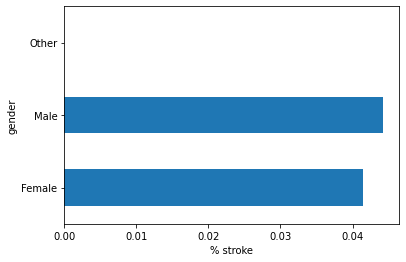

In [66]:
pd.concat([df['gender'], df['stroke']], axis=1).groupby('gender').stroke.mean().plot(kind='barh').set_xlabel('% stroke')

In [13]:
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [33]:
CATEGORICAL_COLUMNS = ['gender', 'ever_married', 'Residence_type', 'smoking_status']
NUMERIC_COLUMNS = ['age','heart_disease','avg_glucose_level','bmi' ]

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='gender', vocabulary_list=('Male', 'Female', 'Other'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='ever_married', vocabulary_list=('Yes', 'No'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Residence_type', vocabulary_list=('Urban', 'Rural'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='smoking_status', vocabulary_list=('formerly smoked', 'never smoked', 'smokes', 'Unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='heart_disease', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='avg_glucose_level', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='bmi', shape=(1,), default_value=None, dtype=tf.float32, 

In [34]:
label=df['stroke']

In [35]:
x=df[['gender', 'ever_married', 'Residence_type', 'smoking_status','age','heart_disease','avg_glucose_level','bmi' ]]
y=df['stroke']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(xtrain, ytrain)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(xtest, ytest, num_epochs=1, shuffle=False)


In [37]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\anshc\\AppData\\Local\\Temp\\tmpql8sqgcc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

print(result['accuracy'])  # the result variable is simply a dict of stats about our model

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\anshc\AppData\Local\Temp\tmpql8sqgcc\model.ckpt-1080
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1080...
INFO:tensorflow:Saving checkpoints for 1080 into C:\Users\anshc\AppData\Local\Temp\tmpql8sqgcc\model.ckpt.
INFO:tensorflow:C:\Users\anshc\AppData\Local\Temp\tmpql8sqgcc\model.ckpt-1080.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:C:\Users\anshc\AppData\Local\Temp\tmpql8sqgcc\model.ckpt-1080.index
INFO:tensorflow:0
INFO:tensorflow:C:\Users\anshc\AppData\Local\Temp\tmpql8sqgcc\model.ckpt-1080.meta
INFO:tensorflow:600
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1080...
INFO:t

In [67]:
print(result)

{'accuracy': 0.95112014, 'accuracy_baseline': 0.95112014, 'auc': 0.8076622, 'auc_precision_recall': 0.16215679, 'average_loss': 0.17988637, 'label/mean': 0.048879836, 'loss': 0.1767214, 'precision': 0.0, 'prediction/mean': 0.020950288, 'recall': 0.0, 'global_step': 2160}
